### Подключение к Google Диску, архивация и загрузка файлов на локальную машину 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

# архивация собранных изображений в zip-архив
#!zip -r /content/kz_mushrooms_data.zip /content/Mushrooms_scrapped_images

In [ ]:
# скачивание на локальный диск

#files.download("/content/kz_mushrooms_info_full.csv")
#files.download("/content/kz_mushrooms_info.csv")
#files.download("/content/images_links_data.json")
#files.download("/content/kz_mushrooms_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1. Сбор данных

### Подключение пакетов

In [ ]:
import csv                       
import os                        

import traceback                  #вывод трассировки при вызове исключений

import requests                   #http-запросы
from bs4 import BeautifulSoup     #парсинг html-страниц

import pandas as pd               #обработка данных
import numpy as np                #numpy массивы

## Парсинг метаданных с веб-страниц списка видов грибо, распространенных в Казахстане
http://fungi.su/infusions/advanced_articles_sort/mycota_reg.php

In [ ]:
page_number = 1

for rowstart in range (0, 480, 30):
  url = 'http://fungi.su/infusions/advanced_articles_sort/mycota_reg.php?&rowstart=%d' % (rowstart) # url страниц списка видов
  page = requests.get(url)
  filename = 'page%s.html' % (page_number)
  page_number += 1
  with open(filename, 'w') as output_file:
    output_file.write(page.text)

In [ ]:
urls = []
titles_rus = []
titles_eng = []
edibility = []
divisio = []
classis = []
ordo = []
familia = []
genus = []
location = []
data_labels = [edibility, divisio, classis, ordo, familia, genus]

def parse_data(data, tag):
  data.append(tag.text.strip())

for rowstart in range (0, 480, 30):
  url = 'http://fungi.su/infusions/advanced_articles_sort/mycota_reg.php?&rowstart=%d' % (rowstart) # url страниц списка видов
  page = requests.get(url) #запрос страницы по заданному URL
  
  soup = BeautifulSoup(page.text) #прогон страницы для получения всего находящейся на ней HTML-разметки
  tds = soup.find_all('td', {'class': 'tbl1_a'}) #поиск всех тегов <td>, в каждом из которых находится информация по одному виду грибов

  for i in range(0, len(tds)):
      atags = tds[i].find_all('a', class_='side') #теги внутри td никак уникально не классифицированы, поэтому делается поиск по всем тегам <a> класса side

      #извлечение url с ссылкой на страницу вида, который находится в первом теге <a>
      href = atags[0].get('href') 
      urls.append(href)
      print(href)

      #информация о названиях находится в первух двух тегах <strong> (жирный шрифт) 
      strongtags = tds[i].find_all('strong')
      titles_rus.append(strongtags[0].text.strip())
      print(strongtags[0].text.strip())
      titles_eng.append(strongtags[1].text.strip())
      print(strongtags[1].text.strip())

      #сбор данных по видам грибов, распространенных в Казахстане, они находятся в тегах <a> с 2 по 6
      for c in range(1, 7):
        parse_data(data_labels[c-1], atags[c])

      #данные о расположении находится в тегах <a> начиная с 7-го, они объединяются в одну строку
      loc = ""
      for k in range(7, len(atags)):
        loc+=str(atags[k].text.strip()) + " "
      location.append(loc)

      for j in range(1, len(atags)):
         print(atags[j].text.strip())
      print('\n')

Выходные данные были обрезаны до нескольких последних строк (5000).
СК


../../articles.php?article_id=1993
Гигрофор еловый
Hygrophorus piceae
Съедобен
Basidiomycota
Agaricomycetes
Agaricales
Tricholomataceae
Hygrophorus
ЮК


../../articles.php?article_id=992
Гигрофор луговой
Cuphophyllus pratensis
Съедобен
Basidiomycota
Agaricomycetes
Agaricales
Tricholomataceae
Cuphophyllus
ЮК
СК


../../articles.php?article_id=2282
Гигрофор пятнистый
Hygrophorus pustulatus
Съедобен
Basidiomycota
Agaricomycetes
Agaricales
Hygrophoraceae
Hygrophorus
ВК


../../articles.php?article_id=876
Гигроцибе багряная
Hygrocybe coccinea
Съедобен
Basidiomycota
Agaricomycetes
Agaricales
Hygrophoraceae
Hygrocybe
ЮК


../../articles.php?article_id=900
Гигроцибе белоснежная
Hygrocybe virginea
Несъедобен
Basidiomycota
Agaricomycetes
Agaricales
Hygrophoraceae
Hygrocybe
ЮК


../../articles.php?article_id=694
Гигроцибе жёлто-зелёная
Hygrocybe chlorophana
Съедобен
Basidiomycota
Agaricomycetes
Agaricales
Hygrophoraceae
Hygr

In [ ]:
#извлечение из ссылок ID статей
articles_ids = []
for i in range(0, len(urls)):
  articles_ids.append(int(urls[i].replace('../../articles.php?article_id=', '')))


### Внесение и сохранение данных в формате датафреймов

In [ ]:
#внесение полученных данных в пустой датафрейм
kz_mushrooms_info_full = pd.DataFrame()

kz_mushrooms_info_full["title_rus"] = np.array(titles_rus)
kz_mushrooms_info_full["title_eng"] = np.array(titles_eng)
kz_mushrooms_info_full["edibility"] = np.array(edibility)
kz_mushrooms_info_full["divisio"] = np.array(divisio)
kz_mushrooms_info_full["classis"] = np.array(classis)
kz_mushrooms_info_full["ordo"] = np.array(ordo)
kz_mushrooms_info_full["familia"] = np.array(familia)
kz_mushrooms_info_full["genus"] = np.array(genus)
kz_mushrooms_info_full["location"] = np.array(location)
kz_mushrooms_info_full["links"] = np.array(urls)
kz_mushrooms_info_full['article_id'] = np.array(articles_ids)

kz_mushrooms_info_full

,title_rus,title_eng,edibility,divisio,classis,ordo,familia,genus,location,links,article_id
0,Агроцибе ранняя,Agrocybe praecox,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Agrocybe,ЮК,../../articles.php?article_id=2162,2162
1,Альбатреллус тянь-шаньский,Albatrellus tianschanicus,Съедобен,Basidiomycota,Agaricomycetes,Russulales,Albatrellaceae,Albatrellus,ЮК,../../articles.php?article_id=835,835
2,Антродия рядовая,Antrodia serialis,Несъедобен,Basidiomycota,Agaricomycetes,Polyporales,Fomitopsidaceae,Antrodia,ВК,../../articles.php?article_id=2384,2384
3,Аскоболус навозный,Ascobolus stercorarius,Несъедобен,Ascomycota,Pezizomycetes,Pezizales,Pyronemataceae,Ascobolus,ЮК,../../articles.php?article_id=834,834
4,Аскокорине блюдцевидная,Ascocoryne cylichnium,Несъедобен,Ascomycota,Leotiomycetes,Helotiales,Helotiaceae,Ascocoryne,ЮК,../../articles.php?article_id=2146,2146
...,...,...,...,...,...,...,...,...,...,...,...
450,Энтолома весенняя,Entoloma vernum,Ядовит,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК,../../articles.php?article_id=661,661
451,Энтолома гладконогая,Entoloma poliopus,Несъедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК,../../articles.php?article_id=1184,1184
452,Энтолома садовая,Entoloma clypeatum,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК,../../articles.php?article_id=53,53
453,Энтолома светло-коричневая,Entoloma saepium,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК,../../articles.php?article_id=54,54


In [ ]:
#внесение полученных данных в пустой датафрейм
kz_mushrooms_info = pd.DataFrame()

#для системы нужны только следующие данные: название на англ. и русском языках, съедобность, род гриба, и ссылка на страницу
kz_mushrooms_info["title_rus"] = np.array(titles_rus)
kz_mushrooms_info["title_eng"] = np.array(titles_eng)
kz_mushrooms_info["edibility"] = np.array(edibility)
kz_mushrooms_info["genus"] = np.array(genus)

kz_mushrooms_info

,title_rus,title_eng,edibility,genus
0,Агроцибе ранняя,Agrocybe praecox,Съедобен,Agrocybe
1,Альбатреллус тянь-шаньский,Albatrellus tianschanicus,Съедобен,Albatrellus
2,Антродия рядовая,Antrodia serialis,Несъедобен,Antrodia
3,Аскоболус навозный,Ascobolus stercorarius,Несъедобен,Ascobolus
4,Аскокорине блюдцевидная,Ascocoryne cylichnium,Несъедобен,Ascocoryne
...,...,...,...,...
450,Энтолома весенняя,Entoloma vernum,Ядовит,Entoloma
451,Энтолома гладконогая,Entoloma poliopus,Несъедобен,Entoloma
452,Энтолома садовая,Entoloma clypeatum,Съедобен,Entoloma
453,Энтолома светло-коричневая,Entoloma saepium,Съедобен,Entoloma


In [ ]:
kz_mushrooms_info_full.to_csv('kz_mushrooms_info_full.csv') #запись датафреймов в формате csv
kz_mushrooms_info.to_csv('kz_mushrooms_info.csv')

---
## *Сбор датасета изображений* 


### Парсинг ссылок на файлы изображений со страниц отдельных видов
http://fungi.su/articles.php?article_id=2162 

In [ ]:
img_links_dict = {}

In [ ]:
for title in titles_rus:                                      
  #в адресе на фрейм с ссылками на изображения в качестве идентификатора используются названия видов на кириллице 
  url = 'http://fungi.su/infusions/advanced_articles_sort/phfa.php?stext=%s'% (title) #URL страницы вида

  page = requests.get(url)                                                #запрос страницы по заданному URL
  soup = BeautifulSoup(page.text, 'html.parser')                          #прогон страницы для получения всего находящейся на ней HTML-разметки
  #print(soup.prettify())                                                 #вывод полученного HTML
                  
  img_tags = soup.find_all('a')                       #все изображения на странице находятся в тегах <a>, у каждого есть атрибут href с ссылкой на галерею

  if len(img_tags) > 30:                              #на странице вида показывается не более 30 изображений
    url = img_tags[30].get('href')                    #чтобы увидеть все сайт предлагает перейти на отдельную страницу по кнопке "Посмотреть все фото", 
    page = requests.get(url)                          #к которой прикреплена последня ссылка на странице (31-ая)
    soup = BeautifulSoup(page.text, 'html.parser')
    img_tags = soup.find_all('a', target='_blank')    #все изображения на странице находятся в тегах <a> c атрибутом target='_blank', у каждого есть атрибут href с ссылкой на галерею

  img_links = []

  for i in range(0, len(img_tags)):
    try:
      href = img_tags[i].get('href')                       #ссылки извлекаются из атрибута href
    except AttributeError as e:                            #если атрибут будет пуст                                                     
      print('Атрибут src пуст, тег пропускаетcя, i=', i'; вид:', title)
      traceback.print_exc()                   
      continue
    except Exception as exception:
      traceback.print_exc()

    
    #print('Ссылка в галлерею: ', href)
    
    img_page = requests.get(href) 
    soup = BeautifulSoup(img_page.text, 'html.parser')
    
    img_direct_tag = soup.find('img', title="Нажмите для просмотра оригинального размера") #поиск в HTML-тексте тега с ссылкой на оригинальное изображение

    try:
      src = img_direct_tag.get('src')                      #в атрибуте src (source) ссылка на источник изображения на сервере
    except AttributeError as e:                            #если атрибут будет пуст                                                     
      print('Атрибут src пуст, тег пропускаетcя, i=', i, '; вид:', title)
      traceback.print_exc()                   
      continue
    except Exception as exception:
      traceback.print_exc()

    
    direct_link = 'http://fungi.su/' + src                #формирование прямой ссылки
    img_links.append(direct_link)
    #print('Прямая ссылка: ', direct_link)

  id = titles_rus.index(title)                            #индекс для ссылки на английское название
  title_eng = titles_eng[id]                              #английское название
  img_links_dict.update({title_eng : img_links})      #словарь, где название вида - ключ, а ссылки на изображения вида - значения
  
  print('#', id, ' Вид:', title_eng, '- Число ссылок:', len(img_links)) 

# 0  Вид: Agrocybe praecox - Число ссылок: 24
# 1  Вид: Albatrellus tianschanicus - Число ссылок: 21
# 2  Вид: Antrodia serialis - Число ссылок: 2
# 3  Вид: Ascobolus stercorarius - Число ссылок: 7
# 4  Вид: Ascocoryne cylichnium - Число ссылок: 7
# 5  Вид: Ascocoryne sarcoides - Число ссылок: 8
# 6  Вид: Asterophora lycoperdoides - Число ссылок: 3
# 7  Вид: Auriculariopsis ampla - Число ссылок: 10
# 8  Вид: Auriscalpium vulgare - Число ссылок: 24
# 9  Вид: Battarrea phalloides - Число ссылок: 8
# 10  Вид: Leucopaxillus gentianeus - Число ссылок: 13
# 11  Вид: Leucopaxillus rhodoleucus - Число ссылок: 8
# 12  Вид: Leucoagaricus rubrotinctus - Число ссылок: 0
# 13  Вид: Boletus edulis - Число ссылок: 0
# 14  Вид: Boletus reticulatus - Число ссылок: 13
# 15  Вид: Boletus pinophilus - Число ссылок: 7
# 16  Вид: Pleurotus eryngii var. ferulae - Число ссылок: 25
# 17  Вид: Bisporella citrina - Число ссылок: 13
# 18  Вид: Byssonectria terrestris - Число ссылок: 2
# 19  Вид: Disciotis venosa 

### Сохранение полученного словаря с собранными ссылками на файлы изображений в формате json 

In [ ]:
import json

# Сохранение словаря со структурой {вид : [список ссылок]} в json формате 

saved_links_data = img_links_dict.copy()
save_file = open("images_links_data.json", "w")
json.dump(saved_links_data, save_file)
save_file.close()

In [ ]:
# Чтение данных из дамп файла

save_file = open("images_links_data.json", "r")
links_dict = save_file.read()
print(links_dict)
save_file.close()

### Загрузка  в хранилище изображений из ссылок по соответствующим директориям

In [ ]:
# создание директории для каждого вида
def create_dir(name):
    dirName = '/content/Mushrooms_scrapped_images/' + name
    os.mkdir(dirName)
    return dirName

In [ ]:
# имя загружаемого файла 
def filename(url):
    filename = url.split('/')[-1]
    return filename

In [ ]:
# имя запрос на получение файла изображения 
def get_image(url):
    img_source = requests.get(url)
    return img_source

In [ ]:
# загрузка пришедшего изображения с заданными именем в обозначенную директорию
def download_image(filename, image, directory):
    f_name_dir = os.path.join(directory, filename)
    with open(f_name_dir, 'wb') as output_file:
      output_file.write(image.content)

In [ ]:
# основная директория

#dirName = 'Mushrooms_scrapped_images'
#os.mkdir(dirName)

In [ ]:
i=0

# ключ словаря будет названием директории, в которую буду скачиваться файлы изображений из ссылок, расположенных в соответсвующем данному ключу списке
for key in img_links_dict:
  i+=1
  print ('#', i, 'Вид: ', key, ', число ссылок: ', len(links_data[key]))
  img_dir = create_dir(key)
  for direct_link in img_links_dict.get(key):
      download_images(filename(direct_link), get_image(direct_link), img_dir)

# 1 Вид:  Agrocybe praecox , число ссылок:  24
# 2 Вид:  Albatrellus tianschanicus , число ссылок:  21
# 3 Вид:  Antrodia serialis , число ссылок:  2
# 4 Вид:  Ascobolus stercorarius , число ссылок:  7
# 5 Вид:  Ascocoryne cylichnium , число ссылок:  7
# 6 Вид:  Ascocoryne sarcoides , число ссылок:  8
# 7 Вид:  Asterophora lycoperdoides , число ссылок:  3
# 8 Вид:  Auriculariopsis ampla , число ссылок:  10
# 9 Вид:  Auriscalpium vulgare , число ссылок:  24
# 10 Вид:  Battarrea phalloides , число ссылок:  8
# 11 Вид:  Leucopaxillus gentianeus , число ссылок:  13
# 12 Вид:  Leucopaxillus rhodoleucus , число ссылок:  8
# 13 Вид:  Leucoagaricus rubrotinctus , число ссылок:  0
# 14 Вид:  Boletus edulis , число ссылок:  0
# 15 Вид:  Boletus reticulatus , число ссылок:  13
# 16 Вид:  Boletus pinophilus , число ссылок:  7
# 17 Вид:  Pleurotus eryngii var. ferulae , число ссылок:  25
# 18 Вид:  Bisporella citrina , число ссылок:  13
# 19 Вид:  Byssonectria terrestris , число ссылок:  2
# 20 Вид

### Проверка совпадания именований классов и их количества используемых данных и их количества по метаданным 

In [ ]:
kz_mushrooms_info_full = pd.read_csv('D:\Downloads\DATA\kz_mushrooms_info_full.csv')
kz_mushrooms_info_full.drop(columns=['links', 'article_id', 'Unnamed: 0'], axis=1, inplace=True)
kz_mushrooms_info_full

,title_rus,title_eng,edibility,divisio,classis,ordo,familia,genus,location
0,Агроцибе ранняя,Agrocybe praecox,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Agrocybe,ЮК
1,Альбатреллус тянь-шаньский,Albatrellus tianschanicus,Съедобен,Basidiomycota,Agaricomycetes,Russulales,Albatrellaceae,Albatrellus,ЮК
2,Антродия рядовая,Antrodia serialis,Несъедобен,Basidiomycota,Agaricomycetes,Polyporales,Fomitopsidaceae,Antrodia,ВК
3,Аскоболус навозный,Ascobolus stercorarius,Несъедобен,Ascomycota,Pezizomycetes,Pezizales,Pyronemataceae,Ascobolus,ЮК
4,Аскокорине блюдцевидная,Ascocoryne cylichnium,Несъедобен,Ascomycota,Leotiomycetes,Helotiales,Helotiaceae,Ascocoryne,ЮК
...,...,...,...,...,...,...,...,...,...
450,Энтолома весенняя,Entoloma vernum,Ядовит,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
451,Энтолома гладконогая,Entoloma poliopus,Несъедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
452,Энтолома садовая,Entoloma clypeatum,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
453,Энтолома светло-коричневая,Entoloma saepium,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК


In [ ]:
fungi_data = kz_mushrooms_info_full['title_eng']
kz_fungi_names = fungi_data.values.tolist()

In [ ]:
data_path = 'D:\Downloads\DATA\KZ_fungi_dataset\kz_fungi_dataset'
fungi_data_classes = os.listdir(data_path)

In [ ]:
print(len(fungi_data_classes))

455


In [ ]:
print(len(kz_fungi_names))

455


In [ ]:
list(set(fungi_data_classes) - set(kz_fungi_names))

[]

In [ ]:
list(set(kz_fungi_names) - set(fungi_data_classes))

[]

# 2. Первичный анализ данных (EDA)

In [ ]:
kz_mushrooms_info_full = pd.read_csv('/content/kz_mushrooms_info_full.csv')

In [ ]:
kz_mushrooms_info_full.drop(columns=['links', 'article_id', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
kz_mushrooms_info_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 9 columns):
title_rus    455 non-null object
title_eng    455 non-null object
edibility    454 non-null object
divisio      455 non-null object
classis      455 non-null object
ordo         455 non-null object
familia      455 non-null object
genus        455 non-null object
location     448 non-null object
dtypes: object(9)
memory usage: 32.1+ KB


In [ ]:
kz_mushrooms_info_full.isna().sum()

title_rus    0
title_eng    0
edibility    1
divisio      0
classis      0
ordo         0
familia      0
genus        0
location     7
dtype: int64

In [ ]:
kz_mushrooms_info_full['location'].fillna('ЮК ЦК ВК СК ЗК', inplace=True)

Пропущенное значение edibility будет заполнено далее

Систематика (таксономия) грибов:

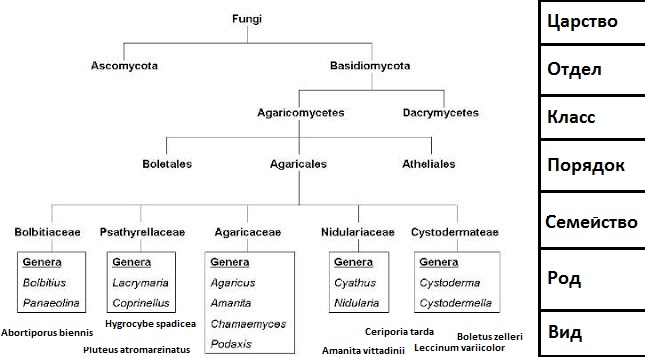
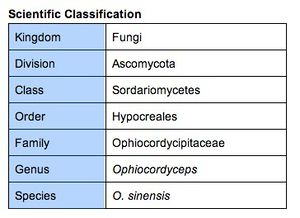



In [ ]:
# уникальные значения каждого столбца
kz_mushrooms_info_full.nunique()


#Грибная систематика
#title - наименование вида (в данном датасете) 
#devisio - отдел
#classis - класс
#ordo - порядок
#familia - семейство
#genus - род

title_rus    455
title_eng    455
edibility      6
divisio        3
classis       11
ordo          32
familia       84
genus        199
location      27
dtype: int64

С каждом ступенью от отдела до вида происходит разделение на в среднем ~2.5-3 подчасти, т.е. 32 отрядя включают 84 семейства (≈2.5 на отряд), 84 семейства 199 родов (также ≈2.5 на семейств), а 199 родов - 455 видов (≈2.3 на род).

In [ ]:
# число видов, распространенных в разных регионах Казахстана.
kz_mushrooms_info_full['location'].value_counts()

ЮК                 245
СК                  52
ЮК ВК СК ЗК         22
ВК СК               21
ЮК ВК               18
ЮК СК               15
ЮК ВК СК            13
ЮК ЦК ВК СК ЗК      12
СК ВК                9
ВК                   7
ЮК ЦК ВК СК ЗК       7
ЮК ЦК ВК СК          6
ВК СК ЗК             5
ЮК СК ВК             5
ЮК ЦК                3
СК ЮК                2
ЦК СК                2
ЮК ЦК СК             2
ЦК ЮК                1
ЦК ВК СК             1
ВК ЮК                1
ЮК ЦК СК ВК ЗК       1
ЮК ЦК ВК             1
ЮК ЗК                1
ЮК ВК ЦК СК ЗК       1
СК ВК ЗК             1
ЦК ВК СК ЗК          1
Name: location, dtype: int64

In [ ]:
south_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЮК')].reset_index(drop=True)
print ('Видов в ЮК:', south_kz_subset.shape[0])
north_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('СК')].reset_index(drop=True)
print ('Видов в СК:', north_kz_subset.shape[0])
east_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ВК')].reset_index(drop=True)
print ('Видов в ВК:', east_kz_subset.shape[0])
west_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЗК')].reset_index(drop=True)
print ('Видов в ЗК:', west_kz_subset.shape[0])
central_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЦК')].reset_index(drop=True)
print ('Видов в ЦК:', central_kz_subset.shape[0])

Видов в ЮК: 356
Видов в СК: 178
Видов в ВК: 132
Видов в ЗК: 51
Видов в ЦК: 38


Съедобен            213
Несъедобен          190
Условносъедобен      25
Ядовит               18
Смертельноядовит      5
Галлюциногенный       3
Name: edibility, dtype: int64 

Съедобен            0.469163
Несъедобен          0.418502
Условносъедобен     0.055066
Ядовит              0.039648
Смертельноядовит    0.011013
Галлюциногенный     0.006608
Name: edibility, dtype: float64 



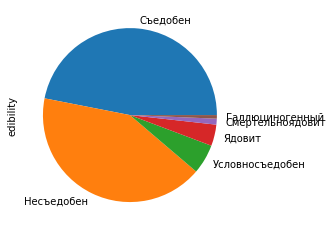

In [ ]:
print(kz_mushrooms_info_full['edibility'].value_counts(), '\n')
print(kz_mushrooms_info_full['edibility'].value_counts(normalize=True), '\n')

kz_mushrooms_info_full['edibility'].value_counts().plot.pie();

Съедобен => гриб можно собирать

Условносъедобен => гриб нужно употреблять в приготовленном виде => гриб можно собирать

Несъедобен, ядовит, смертельноядовит, галлюциногенный => гриб не стоит собирать

Распределение видов, рекомендуемых к сбору и наоборот - ≈52% на ≈48% соответственно. 

#### Подведение статуса съедобности в бинарный вид

In [ ]:
kz_mushrooms_info_full_orig = kz_mushrooms_info_full.copy()

Задачей системы является дать рекомендацию к тому собирать найденный гриб или нет, соответственно все статусы съедобности у видов утилизируются до "съедобен/несъедобен", которые трактуются как "собирать/не собирать" 

In [ ]:
kz_mushrooms_info_full_1 = kz_mushrooms_info_full.copy()
kz_mushrooms_info_full_1 =  kz_mushrooms_info_full_1.loc[kz_mushrooms_info_full_1['edibility'] == 'Условносъедобен']
kz_mushrooms_info_full_1['edibility'] = 'Съедобен'
kz_mushrooms_info_full.loc[kz_mushrooms_info_full_1.index] = kz_mushrooms_info_full_1

In [ ]:
kz_mushrooms_info_full_2 = kz_mushrooms_info_full.copy()
kz_mushrooms_info_full_2 =  kz_mushrooms_info_full_2.loc[(kz_mushrooms_info_full_2['edibility'] == 'Ядовит')
                                          | (kz_mushrooms_info_full_2['edibility'] == 'Смертельноядовит') 
                                          | (kz_mushrooms_info_full_2['edibility'] == 'Галлюциногенный')]
kz_mushrooms_info_full_2['edibility'] = 'Несъедобен'
kz_mushrooms_info_full.loc[kz_mushrooms_info_full_2.index] = kz_mushrooms_info_full_2                                         

Один из видов без статуса съедобности. Проверка по названию: 

"Съедобность: по постановлению Минздрава России, наряду со Свинушкой тонкой, причислена к ядовитым грибам. Тем не менее употребляется в пищу после предварительного отваривания."
http://fungi.su/articles.php?article_id=670

Из-за ядовитого статуса зачислен в несъедобные, несмотря на свою условную съедобность

In [ ]:
kz_mushrooms_info_full_3 = kz_mushrooms_info_full.copy()
kz_mushrooms_info_full_3 =  kz_mushrooms_info_full_3.loc[(kz_mushrooms_info_full_3['edibility'] != 'Съедобен')
                                          & (kz_mushrooms_info_full_3['edibility'] != 'Несъедобен')]
kz_mushrooms_info_full_3

,title_rus,title_eng,edibility,divisio,classis,ordo,familia,genus,location
337,Свинушка ольховая,Paxillus filamentosus,NaN,Basidiomycota,Basidiomycetes,Boletales,Paxillaceae,Paxillus,ЮК ВК СК ЗК


In [ ]:
kz_mushrooms_info_full_3['edibility'] = 'Несъедобен'
kz_mushrooms_info_full.loc[kz_mushrooms_info_full_3.index] = kz_mushrooms_info_full_3

Съедобен      0.523077
Несъедобен    0.476923
Name: edibility, dtype: float64 

Съедобен      238
Несъедобен    217
Name: edibility, dtype: int64


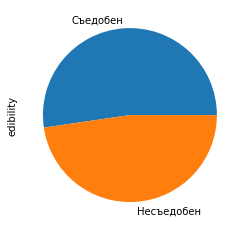

In [ ]:
print(kz_mushrooms_info_full['edibility'].value_counts(normalize=True), '\n')
print(kz_mushrooms_info_full['edibility'].value_counts())

kz_mushrooms_info_full['edibility'].value_counts().plot.pie();

В результате, среди распространенных в Казахстане видов доля несъедобных грибов слегка выше 

#### Исследование данных для проведения обобщения классов

455 уникальных видов грибов, распространенных в Казахстане, - это большое число классов для распознавания. С используемым датасетом нейронная сеть никаким образом не сможет найти и обобщить уникальные паттерны для каждого из видов.
При доступном количестве наблюдений обучить качественную модель невозможно, поэтому некоторые виды необходимо обобщить.
Также классификация будет происходить только по тем видам, что встречаются в отдельных регионах, в частности - в Южном Казахстане.

In [ ]:
south_kz_subset

,title_rus,title_eng,edibility,divisio,classis,ordo,familia,genus,location
0,Агроцибе ранняя,Agrocybe praecox,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Agrocybe,ЮК
1,Альбатреллус тянь-шаньский,Albatrellus tianschanicus,Съедобен,Basidiomycota,Agaricomycetes,Russulales,Albatrellaceae,Albatrellus,ЮК
2,Аскоболус навозный,Ascobolus stercorarius,Несъедобен,Ascomycota,Pezizomycetes,Pezizales,Pyronemataceae,Ascobolus,ЮК
3,Аскокорине блюдцевидная,Ascocoryne cylichnium,Несъедобен,Ascomycota,Leotiomycetes,Helotiales,Helotiaceae,Ascocoryne,ЮК
4,Аскокорине мясная,Ascocoryne sarcoides,Условносъедобен,Ascomycota,Leotiomycetes,Helotiales,Helotiaceae,Ascocoryne,ЮК
...,...,...,...,...,...,...,...,...,...
351,Энтолома весенняя,Entoloma vernum,Ядовит,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
352,Энтолома гладконогая,Entoloma poliopus,Несъедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
353,Энтолома садовая,Entoloma clypeatum,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК
354,Энтолома светло-коричневая,Entoloma saepium,Съедобен,Basidiomycota,Agaricomycetes,Agaricales,Entolomataceae,Entoloma,ЮК


356 видов представлены в южном Казахстане

In [ ]:
south_kz_subset.nunique()

Unnamed: 0    356
title_rus     356
title_eng     356
edibility       2
divisio         3
classis        11
ordo           32
familia        78
genus         173
location       18
dtype: int64

In [ ]:
print(south_kz_subset['edibility'].value_counts())

Несъедобен    185
Съедобен      171
Name: edibility, dtype: int64


Отделы, классы и порядки имеют слишком большие отличия признаков и не поддаются обобщению. 
Разница съедобных/несъедобных видов в рамках одного отряда, семейства или рода показывает, какая из ступеней иерархии в случае обобщения будет наименее критична при предсказывании её классов и определении съедобности.

In [ ]:
south_kz_subset['ordo'].value_counts().head(10)

Agaricales     179
Pezizales       39
Polyporales     24
Boletales       16
Russulales      16
Phallales        7
Xylariales       6
Tremellales      6
Helotiales       6
Stereales        5
Name: ordo, dtype: int64

In [ ]:
south_kz_subset[['ordo', 'familia', 'genus', 'edibility']].value_counts()

ordo        familia         genus        edibility 
Agaricales  Cortinariaceae  Cortinarius  Несъедобен    12
                                         Съедобен      11
            Mycenaceae      Mycena       Несъедобен    11
            Agaricaceae     Agaricus     Съедобен       7
Russulales  Russulaceae     Russula      Съедобен       7
                                                       ..
Helotiales  Helotiaceae     Ascocoryne   Съедобен       1
                                         Несъедобен     1
            Cudoniaceae     Cudonia      Несъедобен     1
Gomphales   Gomphaceae      Ramaria      Съедобен       1
Agaricales  Agaricaceae     Agaricus     Несъедобен     1
Length: 211, dtype: int64

In [ ]:
south_kz_subset['edibility'].groupby(south_kz_subset['ordo']).value_counts(normalize=True)

ordo              edibility 
Agaricales        Съедобен      0.536313
                  Несъедобен    0.463687
Agaricomycetidae  Несъедобен    1.000000
Auriculariales    Съедобен      1.000000
Boletales         Съедобен      0.687500
                  Несъедобен    0.312500
Cantharellales    Несъедобен    0.500000
                  Съедобен      0.500000
Chaetothyriales   Несъедобен    1.000000
Cortinariales     Несъедобен    0.750000
                  Съедобен      0.250000
Dacrymycetales    Несъедобен    0.500000
                  Съедобен      0.500000
Gloeophyllales    Съедобен      1.000000
Gomphales         Несъедобен    0.600000
                  Съедобен      0.400000
Helotiales        Несъедобен    0.666667
                  Съедобен      0.333333
Hymenochaetales   Несъедобен    1.000000
Hypocreales       Съедобен      0.666667
                  Несъедобен    0.333333
Hysterangiales    Несъедобен    1.000000
Leotiales         Несъедобен    1.000000
Lycoperdales      Съедобен  

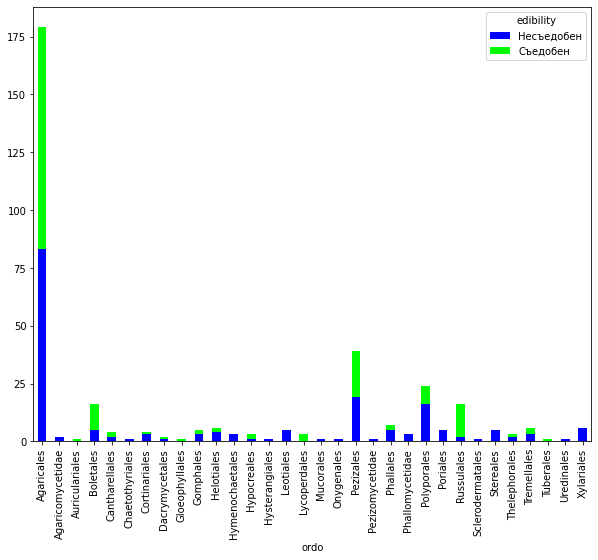

In [ ]:
ordo_ratio = south_kz_subset['edibility'].groupby(south_kz_subset['ordo']).value_counts()
ordo_ratio.unstack().plot.bar(stacked=True, figsize=(10,8), colormap="brg")

Есть 15 отрядов (из 32), в которых есть как съедобные, так и несъедобные виды грибов.

8-9 (25-28%) отрядов имеют примерно равное соотношение съедобных/несъедобных.

Высокая доля подобных классов сильно повредит качеству выдаваемых предсказаний,т.к. даже предсказав верный отряд системы не сможет точно сообщить, стоит ли собирать найденный гриб данного отряда или нет. 

In [ ]:
south_kz_subset['familia'].value_counts().head(10)

Agaricaceae         38
Tricholomataceae    33
Cortinariaceae      27
Strophariaceae      16
Russulaceae         13
Polyporaceae        12
Helvellaceae        11
Mycenaceae          11
Boletaceae           9
Pyronemataceae       9
Name: familia, dtype: int64

In [ ]:
south_kz_subset[['familia', 'genus', 'edibility']].value_counts()

familia         genus        edibility 
Cortinariaceae  Cortinarius  Несъедобен    12
                             Съедобен      12
Mycenaceae      Mycena       Несъедобен    11
Russulaceae     Russula      Съедобен       7
Agaricaceae     Agaricus     Съедобен       7
                                           ..
Pezizaceae      Geopyxis     Несъедобен     1
Paxillaceae     Tapinella    Несъедобен     1
                Paxillus     Съедобен       1
                             Несъедобен     1
Agaricaceae     Agaricus     Несъедобен     1
Length: 207, dtype: int64

In [ ]:
south_kz_subset['edibility'].groupby(south_kz_subset['familia']).value_counts(normalize=True)

familia           edibility 
Agaricaceae       Несъедобен    0.500000
                  Съедобен      0.500000
Albatrellaceae    Съедобен      1.000000
Amanitaceae       Съедобен      1.000000
Amylostereaceae   Несъедобен    1.000000
                                  ...   
Tremellaceae      Несъедобен    0.400000
Tricholomataceae  Съедобен      0.757576
                  Несъедобен    0.242424
Tuberaceae        Съедобен      1.000000
Xylariaceae       Несъедобен    1.000000
Name: edibility, Length: 104, dtype: float64

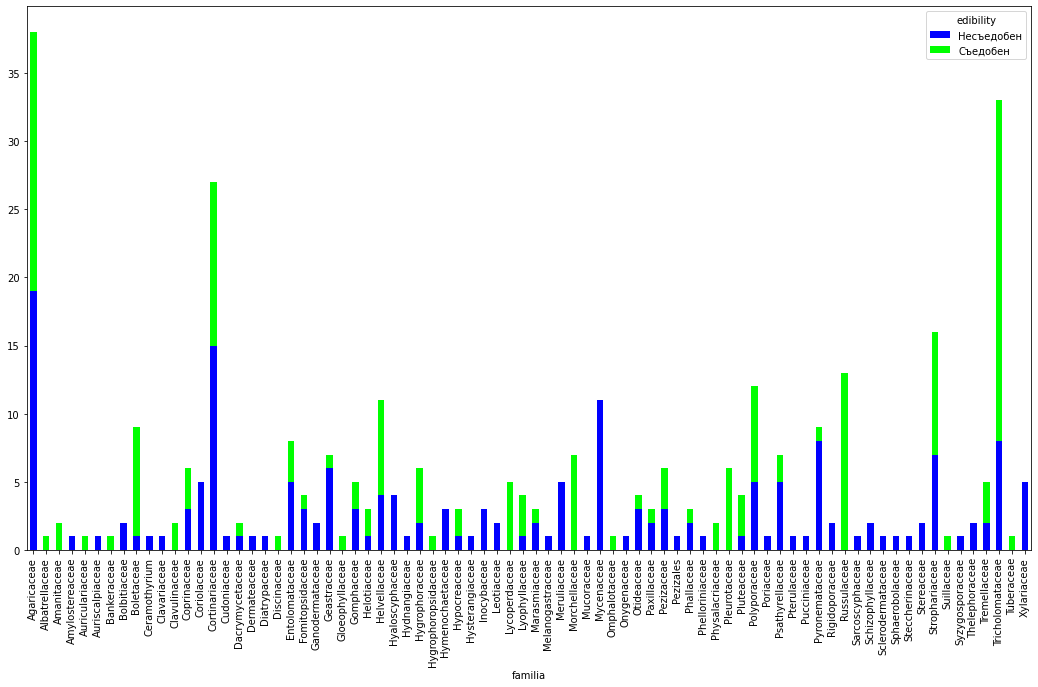

In [ ]:
familia_ratio = south_kz_subset['edibility'].groupby(south_kz_subset['familia']).value_counts()
familia_ratio.unstack().plot.bar(stacked=True, figsize=(18,10), colormap="brg")

Есть 25 семейств (из 78), в которых есть как съедобные, так и несъедобные виды грибов.

14-15 (19%) семейств имеют примерно равное соотношение съедобных/несъедобных.

Качество обобщения семейств немного выше, чем у отрядов, но число классов (78) уже значительно выше.

In [ ]:
south_kz_subset['genus'].value_counts()

Cortinarius    24
Mycena         11
Helvella        9
Tricholoma      8
Agaricus        8
               ..
Paralepista     1
Ripartites      1
Clavulina       1
Schizostoma     1
Nectria         1
Name: genus, Length: 173, dtype: int64

In [ ]:
south_kz_subset[['genus', 'edibility']].value_counts()

genus        edibility 
Cortinarius  Несъедобен    12
             Съедобен      12
Mycena       Несъедобен    11
Agaricus     Съедобен       7
Helvella     Съедобен       7
                           ..
Mutinus      Несъедобен     1
Montagnea    Несъедобен     1
Mollisia     Несъедобен     1
Microstoma   Несъедобен     1
Agaricus     Несъедобен     1
Length: 198, dtype: int64

In [ ]:
south_kz_subset['genus'].groupby(south_kz_subset['familia']).value_counts(normalize=True)

familia      genus      
Agaricaceae  Agaricus       0.210526
             Lepiota        0.131579
             Cyathus        0.078947
             Cystoderma     0.078947
             Calvatia       0.052632
                              ...   
Tuberaceae   Choiromyces    1.000000
Xylariaceae  Hypoxylon      0.400000
             Daldinia       0.200000
             Poronia        0.200000
             Xylaria        0.200000
Name: genus, Length: 186, dtype: float64

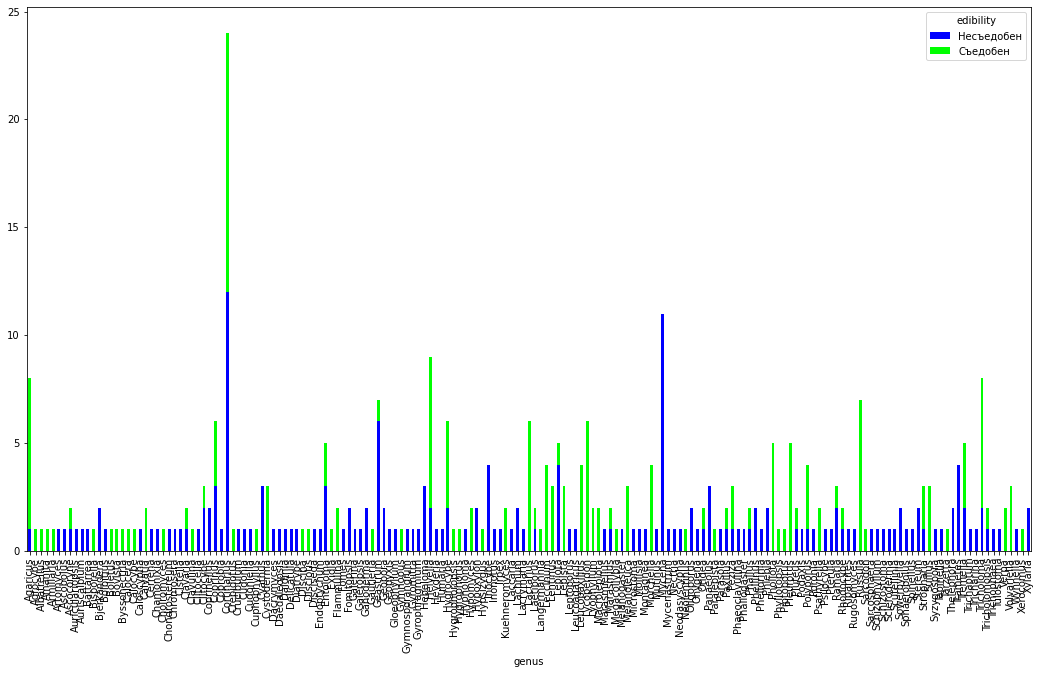

In [ ]:
genus_ratio = south_kz_subset['edibility'].groupby(south_kz_subset['genus']).value_counts()
genus_ratio.unstack().plot.bar(stacked=True, figsize=(18,10), colormap="brg")

Есть 24 род (из 173), в которых есть как съедобные, так и несъедобные виды грибов.

16-17 (~10%) отрядов имеют примерно равное соотношение съедобных/несъедобных. 

## Итого:

*   У родов наименьший доля (10%) неоднозначных с точки зрения неопределенности о статусе съедобности отделнього случайного найденого вида 
*   Присутствует отрицательная корелляция с количество разделений видов на одну единицу таксономии (больше видов на единице -> меньше доля неоднозначных единиц)
*   Относительно отрядов и семейств происходит увелечение числа классов в 5.25 раз (173 родов : 32 отряда) и 2.15 раз (173 родов : 78 семейств) соотвественно

При доступном количестве данных классификация по родам не может быть проведена без дополнительного обобщения до семейств. 

Следовательно, применяется обобщение видов до отрядов и семейств, с учетом данных о соотношении съедобности/несъедобности включаемых видов. 

Пример:
1. Если в семействе все или почти все виды съедобны/несъедобны, то они объеденяются в один класс и маркируются соответствующим статусом съедобности. 
2. Если в семействе есть неопределенность, т.е. разница в количестве съедобных и несъедобных видов не имеет значительного перевеса в одну из сторон, то обобщение классов будет до входящих в это семейство родов.
3. Обобщение видов до родов по принципу из 1 пункта. 

Обобщение проводится вручную среди грибов Южного Казахстана с принятием во внимание схожести их морфологических признаков по изображениям.

## Подготовка региональных датасетов и датасетов с обобщением до родов/семейств

#### Информация о датасетах

In [ ]:
south_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЮК')].reset_index(drop=True)
print ('Видов в ЮК:', south_kz_subset.shape[0])
north_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('СК')].reset_index(drop=True)
print ('Видов в СК:', north_kz_subset.shape[0])
east_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ВК')].reset_index(drop=True)
print ('Видов в ВК:', east_kz_subset.shape[0])
west_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЗК')].reset_index(drop=True)
print ('Видов в ЗК:', west_kz_subset.shape[0])
central_kz_subset = kz_mushrooms_info_full[kz_mushrooms_info_full['location'].str.contains('ЦК')].reset_index(drop=True)
print ('Видов в ЦК:', central_kz_subset.shape[0])

Видов в ЮК: 356
Видов в СК: 178
Видов в ВК: 132
Видов в ЗК: 51
Видов в ЦК: 38


In [ ]:
central_kz_subset.groupby(['familia', 'genus', 'edibility']).size().unstack(fill_value=0)

edibility                      Несъедобен  Съедобен
familia          genus                             
Agaricaceae      Battarrea              1         0
                 Calvatia               0         2
                 Crucibulum             1         0
                 Cyathus                2         0
                 Disciseda              1         0
                 Endoptychum            1         0
                 Mycenastrum            1         0
                 Podaxis                1         0
Bolbitiaceae     Bolbitius              1         0
Cortinariaceae   Hebeloma               1         0
Fomitopsidaceae  Laetiporus             1         0
                 Phaeolus               1         0
Geastraceae      Geastrum               1         0
Gloeophyllaceae  Neolentinus            0         1
Helvellaceae     Helvella               0         1
Hydnangiaceae    Laccaria               0         1
Hymenochaetaceae Coltricia              1         0
Lyophyllaceae    Hypsizygus             0         1
Marasmiaceae     Marasmius              0         1
Paxillaceae      Paxillus               0         1
Pezizaceae       Peziza                 1         0
Phelloriniaceae  Phellorinia            1         0
Pleurotaceae     Pleurotus              0         1
Pluteaceae       Volvariella            0         1
Polyporaceae     Daedaleopsis           1         0
                 Fomes                  1         0
                 Laetiporus             0         1
                 Lentinus               0         1
                 Polyporus              0         2
Russulaceae      Russula                0         1
Strophariaceae   Panaeolus              1         0
Thelephoraceae   Thelephora             1         0
Tricholomataceae Ripartites             1         0
Xylariaceae      Daldinia               1         0
                 Poronia                1         0

In [ ]:
west_kz_subset.groupby(['familia', 'genus', 'edibility']).size().unstack(fill_value=0)

edibility                        Несъедобен  Съедобен
familia           genus                              
Agaricaceae       Agaricus                0         1
                  Calvatia                0         1
                  Gyrophragmium           1         0
                  Mycenastrum             1         0
                  Podaxis                 1         0
Amanitaceae       Amanita                 1         1
                  Pluteus                 0         1
Bolbitiaceae      Bolbitius               1         0
Boletaceae        Boletus                 0         1
                  Leccinum                0         2
                  Suillus                 0         2
                  Xerocomus               0         1
Coprinaceae       Coprinus                0         2
Coriolaceae       Gloeophyllum            1         0
Cortinariaceae    Hebeloma                1         0
Fomitopsidaceae   Laetiporus              1         0
Ganodermataceae   Ganoderma               1         0
Gomphidiaceae     Chroogomphus            0         1
Helvellaceae      Gyromitra               1         0
Hydnangiaceae     Laccaria                0         1
Hymenochaetaceae  Phellinus               1         0
Hypocreaceae      Hypomyces               1         2
Lyophyllaceae     Hypsizygus              0         1
Marasmiaceae      Marasmius               0         1
Otideaceae        Scutellinia             1         0
Paxillaceae       Paxillus                1         1
Pezizaceae        Peziza                  1         0
Pluteaceae        Volvariella             0         1
Polyporaceae      Daedaleopsis            1         0
                  Fomes                   1         0
                  Laetiporus              0         1
                  Lentinus                0         1
                  Polyporus               0         1
Russulaceae       Lactarius               0         2
                  Russula                 0         1
Schizophyllaceae  Schizophyllum           1         0
Sclerodermataceae Scleroderma             1         0
Strophariaceae    Panaeolus               1         0
Thelephoraceae    Thelephora              1         0
Tricholomataceae  Ripartites              1         0
                  Tricholoma              0         1
Xylariaceae       Daldinia                1         0
                  Poronia                 1         0

In [ ]:
df = east_kz_subset.groupby(['familia', 'genus', 'edibility']).size().unstack(fill_value=0)
print(df.to_string()) #чтобы вывести целиком

edibility                          Несъедобен  Съедобен
familia           genus                                
Agaricaceae       Agaricus                  0         2
                  Bovista                   0         1
                  Calvatia                  0         2
                  Crucibulum                1         0
                  Cyathus                   1         0
                  Disciseda                 1         0
                  Langermannia              0         1
                  Lepiota                   0         1
                  Mycenastrum               1         0
                  Podaxis                   1         0
Amanitaceae       Amanita                   3         2
                  Limacella                 0         1
                  Pluteus                   0         1
Amylostereaceae   Artomyces                 1         0
Auriscalpiaceae   Auriscalpium              1         0
Bankeraceae       Sarcodon                  0   

In [ ]:
df = north_kz_subset.groupby(['familia', 'genus', 'edibility']).size().unstack(fill_value=0)
print(df.to_string())

edibility                          Несъедобен  Съедобен
familia           genus                                
Agaricaceae       Agaricus                  0         4
                  Calvatia                  0         2
                  Crucibulum                1         0
                  Cystoderma                0         2
                  Disciseda                 1         0
                  Endoptychum               1         0
                  Mycenastrum               1         0
                  Podaxis                   1         0
Amanitaceae       Amanita                   4         4
                  Limacella                 0         2
                  Pluteus                   0         1
Amylostereaceae   Artomyces                 1         0
Auriscalpiaceae   Auriscalpium              1         0
Bankeraceae       Hydnellum                 3         0
                  Phellodon                 1         0
                  Sarcodon                  0   

In [ ]:
df = south_kz_subset.groupby(['familia', 'genus', 'edibility']).size().unstack(fill_value=0)
print(df.to_string())

edibility                            Несъедобен  Съедобен
familia             genus                                
Agaricaceae         Agaricus                  1         7
                    Battarrea                 1         0
                    Bovista                   0         1
                    Calvatia                  0         2
                    Crucibulum                1         0
                    Cyathus                   3         0
                    Cystoderma                0         3
                    Disciseda                 1         0
                    Endoptychum               1         0
                    Gyrophragmium             1         0
                    Langermannia              0         1
                    Lepiota                   4         1
                    Leucoagaricus             1         0
                    Lycoperdon                0         1
                    Macrolepiota              0         2
              

#### Разбиение данных по регионам

In [ ]:
south_kz_fungi_names = south_kz_subset['title_eng'].values.tolist()
north_kz_fungi_names = north_kz_subset['title_eng'].values.tolist()
west_kz_fungi_names = west_kz_subset['title_eng'].values.tolist()
east_kz_fungi_names = east_kz_subset['title_eng'].values.tolist()
central_kz_fungi_names = central_kz_subset['title_eng'].values.tolist()

In [ ]:
import shutil
import os
from distutils.dir_util import copy_tree #методы для копирования и перемещения директорий и файлов

main_directory = "D:\Downloads\DATA\KZ_fungi_dataset\kz_fungi_dataset"
folders_list = os.listdir(main_directory)

In [ ]:
region_directory = "D:\Downloads\DATA\KZ_fungi_dataset\Regional_datasets\south_kz_fungi_dataset"
species_list = south_kz_fungi_names

#будут копироваться только те директории, названия которых есть в списке наименований видов в регионе 
for folder in folders_list:
    if folder in species_list:
        current_directory = os.path.join(main_directory, folder)
        destination = os.path.join(region_directory, folder)
        copy_tree(current_directory, destination)

In [ ]:
region_directory = "D:\Downloads\DATA\KZ_fungi_dataset\Regional_datasets\east_kz_fungi_dataset"
species_list = east_kz_fungi_names

for folder in folders_list:
    if folder in species_list:
        current_directory = os.path.join(main_directory, folder)
        destination = os.path.join(region_directory, folder)
        copy_tree(current_directory, destination)

In [ ]:
region_directory = "D:\Downloads\DATA\KZ_fungi_dataset\Regional_datasets\west_kz_fungi_dataset" 
species_list = west_kz_fungi_names

for folder in folders_list:
    if folder in species_list:
        current_directory = os.path.join(main_directory, folder)
        destination = os.path.join(region_directory, folder)
        copy_tree(current_directory, destination)

In [ ]:
region_directory = "D:/Downloads/DATA/KZ_fungi_dataset/Regional_datasets/north_kz_fungi_dataset"
species_list = north_kz_fungi_names

for folder in folders_list:
    if folder in species_list:
        current_directory = os.path.join(main_directory, folder)
        destination = os.path.join(region_directory, folder)
        copy_tree(current_directory, destination)

In [ ]:
region_directory = "D:\Downloads\DATA\KZ_fungi_dataset\Regional_datasets\central_kz_fungi_dataset" 
species_list = central_kz_fungi_names

for folder in folders_list:
    if folder in species_list:
        current_directory = os.path.join(main_directory, folder)
        destination = os.path.join(region_directory, folder)
        copy_tree(current_directory, destination)

# 3. Проектирование модели

### Подключение необходимых пакетов

In [2]:
import tensorflow as tf             #tensorflow - фреймворк для работы с ML и DL
from tensorflow import keras        #API для tensorflow

import pathlib                      #модули для работы с файлами      
from glob import glob               
import os
from PIL import Image
import cv2

import numpy as np                  #библиотека для обработки массивов
import pandas as pd                 #библиотека для обработки данных и их анализа 
import random

from keras.preprocessing import image                         #пакеты для подготовки файлов изображений к обработке
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential                           #импорт модели для создания нейронной сети с последовательной структурой слоев
from keras import layers                                      #пакет с различными слоями для построения нейронных сетей
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization

import matplotlib.pyplot as plt      #графики / визуализация
import matplotlib.image as mpimg
%matplotlib inline

#### Проверка подключения и ресурсов GPU

In [ ]:
!nvidia-smi          

"nvidia-smi" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
!nvcc --version # проверка наличия CUDA

"nvcc" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13696234411481036944
]


## Загрузка и предобработка данных

### Загрузка датасета

In [ ]:
import splitfolders   #библиотека, позволяющая разбить данные на 3 выборки: обучающую, валидационную и тестовую 

#splitfolders.ratio(data_path, output="split_sets", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 6420 files [28:32,  3.75 files/s]


#### Локальный источник данных

In [ ]:
#локальный источник данных
#data_path = 'D:/Downloads/University/Diploma/Data_models/archive/Mushrooms'      

In [ ]:
data_path = 'D:/Downloads/University/Diploma/Data_models/archive/split_sets'

test_data_path = 'D:/Downloads/University/Diploma/Data_models/archive/split_sets/test_data_fungi'
train_data_path = 'D:/Downloads/University/Diploma/Data_models/archive/split_sets/train_data_fungi'
val_data_path = 'D:/Downloads/University/Diploma/Data_models/archive/split_sets/val_data_fungi'

folders_list = os.listdir(test_data_path)
folders_list

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

#### Удаленный источник данных

In [5]:
#удаленный источник данных через подключение в облаке к Google Диску
data_path = '/content/drive/MyDrive/kz_fungi_dataset/regional_subsets_generalized/south_kz_fungi_dataset'   

for dir in os.listdir(data_path):
  class_dir = os.path.join(data_path, dir)
  print(dir, ':', len([name for name in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, name))]))  

Hygrocybe : 316
Amanita : 750
Entoloma : 364
Russula : 1148
Agaricus : 353
Cortinarius : 836
Boletus : 1073
Suillus : 1362
Lactarius : 1563


In [6]:
#data_path = '/content/drive/MyDrive/split_sets'        

test_data_path = '/content/drive/MyDrive/split_sets/test_data_fungi'
train_data_path = '/content/drive/MyDrive/split_sets/train_data_fungi'
val_data_path = '/content/drive/MyDrive/split_sets/val_data_fungi'

folders_list = os.listdir(val_data_path)
folders_list

['Lactarius',
 'Suillus',
 'Hygrocybe',
 'Russula',
 'Boletus',
 'Entoloma',
 'Amanita',
 'Agaricus',
 'Cortinarius']

#### Примеры изображений:

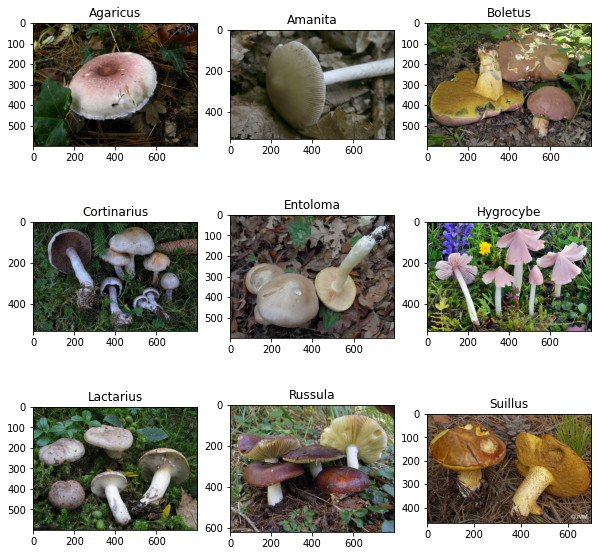

In [5]:
i = 0
for folder in os.listdir(train_data_path):
    image_name = random.choice(os.listdir(os.path.join(train_data_path, folder)))
    
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    i += 1
    axes = plt.subplot(3, 3, i)

    image = mpimg.imread(os.path.join(train_data_path, folder, image_name))
    plt.imshow(image)
    plt.title(folder)

### Аугментации данных и разбиение на батчи

Аугментации - это методы, которые позволяют размножить датасет путем добавления преобразованных или измененных копий уже существующих изображений.  Подобные преобразования включают: повороты, смещения, отражение, вращение, смена контрастности, гаммы и т.п.

В Keras есть класс ImageDataGenerator, который позволяет провести аугментацию данных в реальном времени путём генерации мини-батчей с изображениями в формате 3D тензоров.

Аугументации происходят прямо в ходе обучения каждую эпоху, что позволяет достичь большого разнообразия данных, с аугментациями они почти не повторяются. Входные и выходные изображения сохраняют свой размер и резрешение.  

Преимущества такого способа аугментации:
*   более уникальные изображения позволяют избежать переобучение модели 
*   не нужно хранить все аугментированные копии изображений, что упрощает загрузку датасета



#### Пример конфигурации аугментаций, случайно накладываемых на изображения:

In [101]:
train_gen = ImageDataGenerator(
        rescale=1./255,                   #нормализация
        rotation_range=20,                #поворот от -20 до +20 градусов
        width_shift_range=0.2,            #смещение изображение влево/вправо не более чем на 20% всей длины
        height_shift_range=0.15,           #также, но по высоте
        shear_range=0.2,                  #растягивание изображения, искажая перспективу
        zoom_range=0.2,                   #увелечение/уменьшение изображения      
        #brightness_range=(0.5, 1.0),      #яркость
        horizontal_flip=True,             #отзеркаливание по вертикали
        )                                 #отзеркаливание по вертикали


# изображения преобразуются в тензоры размерности 240x240x3, элементы тензора заполняются значения цветового диапазона пикселя от 0 до 255 в R/G/B цветовых каналах
# для тестовой выборки только нормализуем значения, чтобы они приняли диапазон от 0 до 1
test_gen = ImageDataGenerator(
    rescale=1./255
    )

#### Инициализация генераторов батчей 

In [104]:
from keras.applications.resnet50 import preprocess_input

image_height = 240
image_width = 240

# предобученным сетям нужно вводить свои заготовленные дата-генераторы
# preprocess_input применяется на каждое входящее изображение после преобразования размера и аугментирования (в данном случае последние не конфигурируются)
# preprocess_input переводит RGB в BGR формат и Batch Normalization на цветовые каналы   
# Batch Normalization позволяет улучшить скорость сходимости градиентного спуска
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [103]:
# загрузка и проход генератора по обучающему датасету с помощью метода ImageDataGenerator.flow_from_directory()
# из загруженных данных генератор создаст батчи случайным образом аугментированных изображений 
train_generator = data_generator.flow_from_directory(
        directory=train_data_path,
        batch_size=100,                               #размер батча
        target_size=(image_height, image_width),      # размер всех изображений будет транформирован в 240x240
        class_mode='categorical',                     # мультиклассовая классификация
        shuffle=True)                                 # изменение порядка изображений

batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

validation_generator = data_generator.flow_from_directory(
        directory=val_data_path,
        batch_size=50, 
        target_size=(image_height, image_width),
        class_mode='categorical',
        shuffle=True) 


batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


test_generator = data_generator.flow_from_directory(
    directory=test_data_path,
    batch_size=1,
    target_size=(image_height, image_width),
    class_mode='categorical',
    shuffle=False)
batchX, batchy = test_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 5367 images belonging to 9 classes.
Batch shape=(100, 240, 240, 3), min=-123.680, max=151.061
Found 668 images belonging to 9 classes.
Batch shape=(50, 240, 240, 3), min=-123.680, max=151.061
Found 679 images belonging to 9 classes.
Batch shape=(1, 240, 240, 3), min=-123.680, max=120.061


In [105]:
train_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'Entoloma': 4,
 'Hygrocybe': 5,
 'Lactarius': 6,
 'Russula': 7,
 'Suillus': 8}

#### Визуализации аугментированных изображений

In [97]:
def show_images(image):
  fig, axes = plt.subplots(1, 6, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(image, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

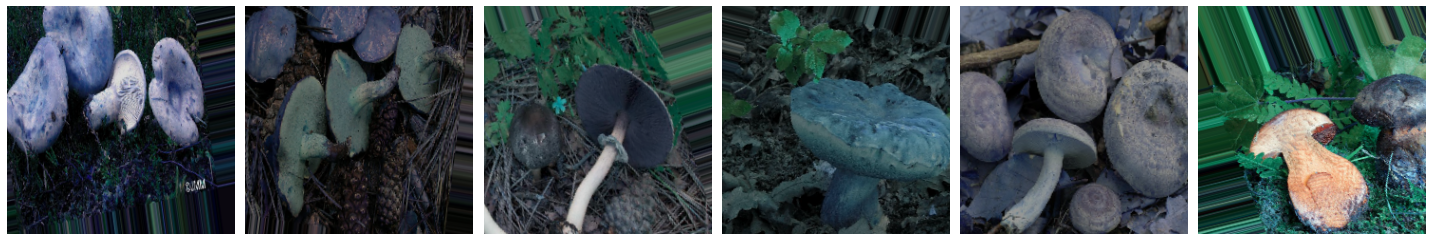

In [100]:
sample_training_images, _ = next(train_generator)
show_images(sample_training_images[:6])

## Построение и обучение модели классификации

In [6]:
# предотвращение ошибки "Image File is truncated" при загрузки изображений PIL 

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Иницализация и компиляция модели

Модель проектируется по архитектуре свёрточных нейронных сетей. Sequential определяет последовательную структуру расположения слоёв нейронной сети. 

Свёрточные нейронных сети можно разделить на две части: 
*   серия свёрточных слоев и pooling слоев, выделяющих признаки изображений до абстрактных понятий
*   полносвязная нейронная сеть, выделяющая закономерности признаков

В Keras доступен пакет applications, включающий предобученные нейронные сети с настроенными гипер-параметрами и корректированными весовыми коэфициентами

Эти модели были обучены на масштабных датасетах в течении длительного времени, поэтому при добавлении в архитектуру своей модели их веса необходимо заморозить.

В архитектуре используется предобученная сеть ResNet50 - модель свёрточной сети от компании Microsoft с 50 скрытыми слоями, обученная на данных ImageNet (14 млн. помеченных разнообразных изображений, в том числе грибы). ResNet — это сокращенное название для Residual Network

После загрузки из applications, ResNet50 устанавливается в начале архитектуры. Её входной слой принимает 4D тензоры формата (None, 240, 240, 3) - (батч, строки, столбцы, каналы).

На выходе выделенные свёрточными слоями 2D карты признаков будут объеденены и преобразованы в 1D одномемерный массив, которые будет подан на вход полносвязной нейросети. 

In [3]:
from tensorflow.keras.applications import ResNet50
model = tf.keras.Sequential()

# основа модели будет предобученная сеть архитектуры ResNet50
model.add(ResNet50(include_top = False, weights = "imagenet", pooling = "avg"))

94773248/94765736 [==============================] - 1s 0us/step


В ResNet50 батчи проходят последовательные операции свёртки и батч нормализации. Pooling слой только один, он производит объедение и сжатие после первого слоя свёртки, тип сжатия - среднее значение элемента подвыборки

In [ ]:
# построение модели с выходным слоем на 9 классов
model.add(BatchNormalization())                      # BatchNormalization() применяется к предыдущему слою модели   
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(9, activation = "softmax"))

1.   Скрытый слой Dense явлется частью полносвозвязной сети и связывает все входные значения со своими нейронами, после чего уже все свои нейронами со всеми у следующего слоя и применяет к ним функцию активации, в данном случае ReLu

    Параметры Dense являются гипер-параметрами всей модели, которые напрямую влияют на процесс обучения: units - число нейронов, input_shape - число входов, activation - тип функции активации]

    Функция промежуточных слоев ReLu: f(x) = max(0, x), с производной = 1, т.е. при положительном аргументе она вернет сам аргумент, а при отрицательном - 0. Это позволяет сети в равной степени корректировать веса на всех слоях сети, вместо значительного снижения изменений к последнему слою.
2.   Выходной слой также класса Dense, число нейронов на этом слое означает число идентифицируемых классов.

    Функция активации на выходном слое softmax - частный случай логистической функции sigmoid для работы с векторами. softmax применяется с использованием критерия качества categorial cross-entropy (обобщенный случай бинарной перекрестной энтропии для классификации 3-х и более классов)

    Применение softmax очень полезно в задачах классификации, потому-что значения выходного слоя можно интерпретировать как вероятности принадлежности внесенного наблюдения к классам, которые привязаны к нейронам выходного слоя

Batch normalization после каждого слоя - один из способов  ускорить сходимость алгоритма, тем самвы уменьшив время обучения, а также помогает избежать переобучения DL моделей с большим числом скрытых слоев. Применяется также ко всем слоям ResNet50.

In [122]:
# замораживает веса предобученной сети ResNet50
model.layers[0].trainable = False

После определения структуры слоев модель компилируется

compile создаёт модель с заданными случайными весовыми коэффициентами, после чего она готова к обучению

Параметры компиляции (также считаются гипер-параметрами сети): 

*   критерий качества (loss-функция, cost-функция) - категориальная перекрестная энтропия, которая сравнивает распределение результатов, которые получила модель, и верные ответы,  минимизирует градиентным спуском разницу между ними
*   способ оптимизациия градиентного спуска (поиска минимума) - Adam (настраивается шаг сходимости/learning rate - 0.001)

Adam - 

learning rate, или же шаг сходимости - это коэффициент скорости обучения (который можно рассматривать как шаг в правильном направлении для минимизации loss), learning rate подбирается таким образом, чтобы он не был слишком велик и при движении не пропускал функции, а также чтобы он не был слишком мал, т.к. это замедлит скорость сходимости алгоритма оптимизации градиентного спуска


In [123]:
from keras import optimizers

opt_adam = keras.optimizers.Adam(lr=0.001) #learning rate 0.001 (определяет скорость сходимости и обучения)
# компиляция модели
# метод оптимизации градиентного спуска - Adam 
# критерий качества - категориальная перекрестная энтропия, т.к. классов больше 2
# фиксирует метрику точности классификации accuracy
model.compile(loss = 'categorical_crossentropy', optimizer = opt_adam, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [124]:
#input_shape=(None, 240, 240, 3) - картинка 240 на 240 пикселя с 3 каналами цвета в градации значений от 0 до 255 
# (первый элементы кортежа отвечает за число батчей, для построения None)
input_shape = (None, 240, 240, 3)
model.build(input_shape)

In [126]:
#архитектура модели
model.summary()
#тип слоя ----------------- размер вывода ------ настраиваемые параметры (веса)
#resnet50 на выходе содержит Flatten слой
#Flatten преобразует изображение со свёрточных слоев в одномерный массив, который становится входным слоем полносвязной сети
#болбшое число параметров CNN уже предварительно настроены, поэтому корректировке подлежат только веса полносвязной сети    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Обучение модели

In [ ]:
# callback - функция, которая может быть применена в ходе обучения
# такие функции могут помочь отследить информацию о параметрах модели

# данные коллбеки отслеживают точность на валидационной выборке
# EarlyStopping останавливает процесс обучения, если на протяжении 3 эпох val_accuracy не улучшается
# restore_best_weights=False возвращает весовые коэффициенты с последней эффективной эпохи (True - самый наивысший за все эпохи)
earlystop_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose=1,
                                              patience=3, restore_best_weights=False)

# ReduceLROnPlateau уменьшает значением параметра шага сходимости (learning rate) для градиентного спуска
# меньшее значение learning rate помогает улучшить процесс оптимизации, но также ведёт к падению скорости обучения
# если на протяжении 2 эпох val_accuracy стагнирует, то функция уменьшает learning_rate оптимизатора на 0.01
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 mode='max',      #если val_accuracy перестает расти
                                                 patience=2,      #на протяжении 2 эпох
                                                 factor=0.1,      #learning rate уменьшается с коэффициентом 0.1 => lr*0.1
                                                 cooldown=2,      #повторно может сработать только через 2 эпохи
                                                 min_lr=0)        #минимальное значения learning rate


# ModelCheckpoint в конце каждой эпохи сохраняет модель и весовые коэффициенты, если val_loss был наименьший за всех эпохи
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath='/content/sample_data',
                                                monitor = 'val_loss', save_best_only = True, mode = 'auto',
                                                save_weights_only=True)
#model.load_weights(filepath)                                    


In [78]:
train_set_size = sum(len(files) for root, dirs, files in os.walk(train_data_path))
val_set_size = sum(len(files) for root, dirs, files in os.walk(val_data_path))
test_set_size = sum(len(files) for root, dirs, files in os.walk(test_data_path))
print('Размер обучающей выборки:', train_set_size, '\nРазмер валидационной выборки:', val_set_size, '\nРазмер тестовой выборки:', test_set_size)

Размер обучающей выборки: 5367 
Размер валидационной выборки: 668 
Размер тестовой выборки: 679


для обучение применяется метод fit_generator()

в fit_generator() подаются инициализированные ранее объекты ImageDataGenerator для обучающей и валидационной выборки, которые подают на вход сети батчи с изображениями заданной размера. Число эпох определяет число итераций оптимизации loss функции и обновления весовых коэффициентов

batch_size - размер подаваемое батча, т.е. в данном случае каждые 32 изображения будет проходить коррекция весов

Размер выборки валидации - 10% от всего датасета

In [ ]:
history = model.fit_generator(train_generator, validation_data = validation_generator, 
        steps_per_epoch=int(train_set_size/100) + 1, validation_steps=int(val_set_size/50) + 1,  # steps_per_epoch * batch_size = число образцов, обработанных в каждой эпохе
        epochs = 20, callbacks=[earlystop_cb, checkpoint_cb])                                                               # использование многопоточности

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
54/54 [==============================] - 1842s 34s/step - loss: 1.0757 - accuracy: 0.6473 - val_loss: 0.9405 - val_accuracy: 0.7021
Epoch 2/20
54/54 [==============================] - 1156s 21s/step - loss: 0.3480 - accuracy: 0.8979 - val_loss: 0.7320 - val_accuracy: 0.7620
Epoch 3/20
54/54 [==============================] - 1158s 21s/step - loss: 0.1477 - accuracy: 0.9696 - val_loss: 0.6687 - val_accuracy: 0.7560
Epoch 4/20
54/54 [==============================] - 1168s 22s/step - loss: 0.0634 - accuracy: 0.9935 - val_loss: 0.5894 - val_accuracy: 0.7934
Epoch 5/20
54/54 [==============================] - 1153s 21s/step - loss: 0.0311 - accuracy: 0.9993 - val_loss: 0.5652 - val_accuracy: 0.8114
Epoch 6/20
54/54 [==============================] - 1153s 21s/step - loss: 0.0171 - accuracy: 0.9996 - val_loss: 0.5702 - val_accuracy: 0.8084
Epoch 7/20
54/54 [==============================] - 1151s 21s/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.5745 - val_accuracy: 0.8159

Сработал EarlyStopping коллбэк и модель прекратила обучение после 14 эпох. 

## Оценка качества обучения модели

### Метрики

In [ ]:
#evaluate позволяет оценить качество обучения модели на валидационной или тестовой выборке 
loss, accuracy = model.evaluate_generator(generator=validation_generator, steps=int(val_set_size/50) + 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('Оценка качества модели:\naccuracy =', accuracy, '\nloss =', loss)

Оценка качества модели на тесовой выборке:
accuracy = 0.8218562602996826 
loss = 0.6264652609825134


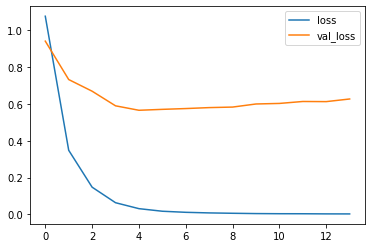

In [ ]:
# график изменений значений функции потерь в ходе эпох обучения 
history_plot = pd.DataFrame(history.history)
history_plot.loc[:, ['loss', 'val_loss']].plot();

Модель переобучена, о чём говорит расхождение графиков обучающей и валидационной выборки, но тестовая выборка показывает хорошую точность..

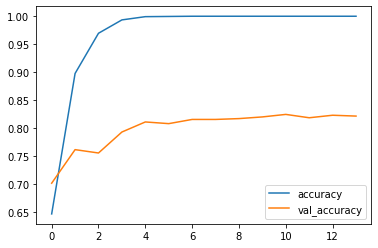

In [ ]:
# график изменений значений точности классификации на обучающей и валидационной выборке

history_plot.loc[:, ['accuracy', 'val_accuracy']].plot();

In [92]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_set_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [93]:
print('Оценка точности модели на тесовой выборке:\naccuracy =', test_accuracy)

Оценка точности модели на тесовой выборке:
accuracy = 0.8262150287628174


### Классификатор

In [26]:
# размер тестовой выборки
filenames = test_generator.filenames
print(len(filenames))

679


чтобы внести в нейронную сеть какие-либо новые данные используется метод predict 

это позволяет узнать какие весовые коэфициенты в итоге были найдены нейронной сетью в процессе обучения 

и уже на основе этих весо

таким образом можно ввести своё изображение (или набор изображений) и распознать вид гриба на нём, после уже с помощью данных о видах узнать съедобен он или нет 

model.predict(val_X)

чтобы получить сами веса, можно вспользоваться методом get_weights()
model.get_weights() 

In [251]:
# перезагрузка test_generator требуется перед каждым вызовом predict_generator, чтобы сбросить предыдущие выходы
test_generator.reset()

# генерация предсказаний модели классов изображений из тестовой выборки 
pred = model.predict_generator(test_generator, steps=test_set_size, verbose=1)        # выходы с выходного слоя в виде вероятностей
predicted_classes = np.argmax(pred, axis=1)                                         # индекс элемента с максимальным значением означает номер класса

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


679/679 [==============================] - 161s 236ms/step


In [253]:
labels = test_generator.class_indices
labels_dict = dict((v,k) for k, v in labels.items())
predictions = [labels_dict[k] for k in predicted_classes]
print('Предсказанные классы:', predicted_classes)                 #результат классификации всех изображений тестовой выборки ->  
print('Идентификатор класса : ', labels)                          #-> числам соответствуют определенные классы ->
print('Наименования по порядку: ', predictions[:10])              #-> порядкой номер входа файла изображения имеет соответствующий индекс

Предсказанные классы: [0 0 0 1 0 0 0 0 0 3 0 6 0 0 3 3 1 0 0 0 0 1 0 6 1 0 6 0 0 0 0 7 0 0 0 0 1
 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 7 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 7
 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 6 2 2 2 8 2 2 2 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 2 7 2 2 2 2 2 2 2 6 8
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 7 4 3 1 3 3 3 3 3 3 3 3 3 6 3 4 3 3 3 3 7 3 3 3 3 3 3 3 3 3 3 4 5 3 3 3
 3 3 2 3 3 3 4 3 3 3 6 3 6 7 3 3 3 3 3 3 2 8 8 3 3 3 3 3 3 3 8 3 3 3 6 8 3
 3 3 0 8 3 3 3 3 4 4 4 4 4 4 4 3 4 6 1 4 4 4 4 4 4 7 4 4 1 4 4 4 6 4 6 5 6
 4 4 4 4 4 4 4 4 5 7 4 5 5 5 5 5 5 5 7 5 5 4 5 5 5 7 5 5 5 6 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 1 6 5 5 6 6 7 6 6 6 6 7 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 7 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 3 7 6 6 6 6 6 6 6 6
 6 6 6 6 8 2 6 6 5 6 6 6 6 6 6 6 3 6 6 1 6 6 6 7 6 6 7 6 6 6 6 6 6 6 6 6 6
 2 

In [254]:
# сохранение результатов классификации тестовой выборки
prediction_results = pd.DataFrame()
prediction_results["Filenames"] = filenames
prediction_results["Predictions"] = predictions
prediction_results.to_csv("prediction_results.csv", index=False)

prediction_results.head(10)

,Filenames,Predictions
0,Agaricus/011_WtefvQHAs0w.jpg,Agaricus
1,Agaricus/041_6hQILEaXRtg.jpg,Agaricus
2,Agaricus/067_9AjDFE60KkU.jpg,Agaricus
3,Agaricus/072_qMKO1Y6SWIw.jpg,Amanita
4,Agaricus/098_TDMUA-5wc9A.jpg,Agaricus
5,Agaricus/101_ocRZyv2hUFg.jpg,Agaricus
6,Agaricus/121_yYP_idjfBCU.jpg,Agaricus
7,Agaricus/148_Q5sVm9VpCR0.jpg,Agaricus
8,Agaricus/191_PQGCrB3DUtU.jpg,Agaricus
9,Agaricus/193_4lmqybsoM7M.jpg,Cortinarius


Суммы вероятностей:
 [[1.368e-01 9.730e-02 6.742e-01 2.000e-04 2.620e-02 6.000e-04 1.020e-02
  5.000e-04 5.410e-02]] sum = [1.0001]
Название файла: jpg_Il_reticolo_che_si_estende_su_tutto_il_gambo-_Ottimo_commestibile_anche_crudo_c_Mazza.jpg


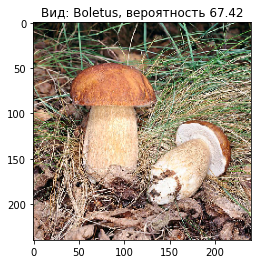

,Probability,Species,Edibility,ciryllic_name
0,13.680000,Agaricus,Съедобен,Шампиньон
1,9.730000,Amanita,Несъедобен,Мухомор
2,67.419998,Boletus,Съедобен,Боровик
3,0.020000,Cortinarius,Несъедобен,Паутинник
4,2.620000,Entoloma,Несъедобен,Энтолома
5,0.060000,Hygrocybe,Несъедобен,Гигроцибе
6,1.020000,Lactarius,Съедобен,Груздь
7,0.050000,Russula,Съедобен,Сыроежка
8,5.410000,Suillus,Съедобен,Маслёнок


In [75]:
file = '/content/jpg_Il_reticolo_che_si_estende_su_tutto_il_gambo-_Ottimo_commestibile_anche_crudo_c_Mazza.jpg'
img_size = 240

img = image.load_img(file, target_size=(img_size, img_size))     #загрузить своё изображение и подгонать под нужный размер
plt.imshow(img)                                                  #показать изображение
  
test_image = image.img_to_array(img)                               # преобразование изображения в 3D тензор
test_image = np.expand_dims(test_image, axis=0)                    # преобразование в 4D тензор - формат, в котором проходил обучение (за счёт батчей)

pred_p = trained_model.predict(test_image)                         # новое предсказание
predicted_class = np.argmax(pred_p, axis=1)                        
                                                                   # индекс элемента с максимальным значением соответствует ->
prob_labels = test_generator.class_indices                         # -> индексу класса изображения в test_generator 
prob_labels_dict = dict((v,k) for k, v in prob_labels.items())
prob_class_prediction = [prob_labels_dict[k] for k in predicted_class]    # наименование класса

result_prob = np.round(pred_p, 4)                                   #округленные до 4-х знаков после запятой вероятности

print('Суммы вероятностей:\n',result_prob, 'sum =', result_prob.sum(axis=1))
print('Название файла:', file.split('/')[-1])

prob_df = pd.DataFrame()                                            #вывод вероятностей по каждому классу
prob_df['Probability'] = np.array(result_prob[0]*100)
prob_df['Species'] = prob_labels
prob_df['Edibility'] = edibility_info['edibility']
prob_df['ciryllic_name'] = edibility_info['title_rus']

title = ('Вид: %s, вероятность %.2f' % (prob_class_prediction[0], np.amax(result_prob)*100), '%')
plt.title(title[0])

plt.savefig("prediction_example.png")
plt.show()

prob_df

Данные о съедобности:

In [12]:
edibility_info = pd.read_csv('/content/drive/MyDrive/kz_fungi_dataset/metadata/south_kz_edibility_info.csv')
#edibility_info.drop(columns=['Unnamed: 0'])
edibility_info

,title_eng,edibility,title_rus
0,Agaricus,Съедобен,Шампиньон
1,Amanita,Несъедобен,Мухомор
2,Boletus,Съедобен,Боровик
3,Cortinarius,Несъедобен,Паутинник
4,Entoloma,Несъедобен,Энтолома
5,Hygrocybe,Несъедобен,Гигроцибе
6,Lactarius,Съедобен,Груздь
7,Russula,Съедобен,Сыроежка
8,Suillus,Съедобен,Маслёнок


## Сохранение и загрузка обученной модели

In [21]:
# сериализация модели в формат json
save_model = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(save_model)
# сериализация весовых коэффициентов в формат HDF5
model.save_weights("weights.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [14]:
from keras.models import model_from_json


# загрузить json и пересоздать модель
saved_model = open('/content/model (2).json', 'r')
recreated_model = saved_model.read()
saved_model.close()
trained_model = model_from_json(recreated_model)
# загрузить веса в модель
trained_model.load_weights("/content/weights (1).h5")

opt_adam = keras.optimizers.Adam(lr=0.001) #
trained_model.compile(loss = 'categorical_crossentropy', optimizer = opt_adam, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
